# Customer Segmentation using RFM Analysis and K-Means Clustering

Dataset : Olist Brazil e-commerce Dataset           
Business Problem :
- How to segment the customers at Olist marketplace so we can divide customers based on their shopping behaviour?
- What kind of treatment for each cluster to increase retention rate customer?

# Import Library and Dataset

In [1]:
# Data
import pandas as pd
import numpy as np
import datetime as dt

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

# Modeling
from sklearn.cluster import KMeans

# Evaluation
from sklearn.metrics import silhouette_score

#Scaling
from sklearn.preprocessing import StandardScaler

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import dataset
olist_order = pd.read_csv(r'C:\Users\user\Documents\Data Science\Customer Segmentation\Dataset\olist_orders_dataset.csv')
olist_item = pd.read_csv(r'C:\Users\user\Documents\Data Science\Customer Segmentation\Dataset\olist_order_items_dataset.csv')
olist_payment = pd.read_csv(r'C:\Users\user\Documents\Data Science\Customer Segmentation\Dataset\olist_order_payments_dataset.csv')
olist_product = pd.read_csv(r'C:\Users\user\Documents\Data Science\Customer Segmentation\Dataset\olist_products_dataset.csv')
olist_customer = pd.read_csv(r'C:\Users\user\Documents\Data Science\Customer Segmentation\Dataset\olist_customers_dataset.csv')
olist_review = pd.read_csv(r'C:\Users\user\Documents\Data Science\Customer Segmentation\Dataset\olist_order_reviews_dataset.csv')
olist_translate = pd.read_csv(r'C:\Users\user\Documents\Data Science\Customer Segmentation\Dataset\product_category_name_translation.csv')

In [3]:
# merge dataset
df_olist = pd.merge(olist_order, olist_item, on='order_id', how='left')
df_olist = pd.merge(df_olist, olist_product, on='product_id', how='inner')
df_olist = pd.merge(df_olist, olist_payment, on='order_id', how = 'left')
df_olist = pd.merge(df_olist, olist_review, on='order_id', how='left')
df_olist = pd.merge(df_olist, olist_customer, on='customer_id', how='right')
df_olist = pd.merge(df_olist, olist_translate, on='product_category_name', how='inner')

In [4]:
df_olist.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,00e7ee1b050b8499577073aeb2a297a1,06b8999e2fba1a1fbc88172c00ba8bc7,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,...,4.0,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,office_furniture
1,b2059ed67ce144a36e2aa97d2c9e9ad2,4e7b3e00288586ebd08712fdd0374a03,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,bd07b66896d6f1494f5b86251848ced7,...,5.0,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,office_furniture
2,951670f92359f4fe4a63112aa7306eba,b2b6027bc5c5109e529d4dc6358b12c3,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,a5647c44af977b148e0a3a4751a09e2e,...,5.0,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,office_furniture
3,997fd4b37386d10b57d4ac8cdec011a6,4c06b42fbf7b97ab10779cda5549cd1c,delivered,2018-07-08 09:59:19,2018-07-08 10:30:15,2018-07-25 15:12:00,2018-08-08 19:42:53,2018-08-16 00:00:00,1.0,8ed094bfe076c568f6bb10feada3f75d,...,1.0,Nada de produto,"Ainda não recebi o produto. Sendo assim, não p...",2018-08-09 00:00:00,2018-08-14 11:40:54,07d190f123147d9e89d4b922543d7948,65075,sao luis,MA,office_furniture
4,b63fff1ef8b6201df68bb611ee41129e,8276de07ef25225d412b8462d73f8664,delivered,2017-04-02 22:15:27,2017-04-04 05:55:19,2017-04-13 16:28:06,2017-05-02 13:53:25,2017-05-08 00:00:00,1.0,aba86c093ccdbac75b09111d57e50004,...,4.0,NaN,"A crítica é à entrega, pois por se tratar dos ...",2017-05-03 00:00:00,2017-05-03 21:06:33,332cf4e83e16004ba7dca932ce82475b,90010,porto alegre,RS,office_furniture


# Data Cleaning

## Drop Useless Columns

In [5]:
df_olist_clean = df_olist.drop(columns=['order_status', 'order_approved_at', 'order_delivered_customer_date', 'order_delivered_carrier_date', 'order_delivered_customer_date', 
                                  'order_estimated_delivery_date', 'seller_id', 'shipping_limit_date','product_category_name', 'product_name_lenght', 
                                  'product_description_lenght', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm',
                                  'payment_installments','review_id', 'review_comment_title', 'review_comment_message', 'review_creation_date', 
                                  'review_answer_timestamp', 'customer_id', 'customer_city', 'customer_state', 'product_photos_qty', 'freight_value', 'payment_sequential'])

## Handling Missing Value

In [6]:
df_olist_clean.isnull().sum()

order_id                         0
order_purchase_timestamp         0
order_item_id                    0
product_id                       0
price                            0
payment_type                     3
payment_value                    3
review_score                     0
customer_unique_id               0
customer_zip_code_prefix         0
product_category_name_english    0
dtype: int64

In [7]:
df_olist_clean[df_olist_clean['payment_type'].isnull()]

,order_id,order_purchase_timestamp,order_item_id,product_id,price,payment_type,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,product_category_name_english
51505,bfbd0f9bdef84302105ad712db648a6c,2016-09-15 12:16:38,1.0,5a6b04657a4c5ee34285d1e4619a96b4,44.99,NaN,NaN,1.0,830d5b7aaa3b6f1e9ad63703bec97d23,14600,health_beauty
51506,bfbd0f9bdef84302105ad712db648a6c,2016-09-15 12:16:38,2.0,5a6b04657a4c5ee34285d1e4619a96b4,44.99,NaN,NaN,1.0,830d5b7aaa3b6f1e9ad63703bec97d23,14600,health_beauty
51507,bfbd0f9bdef84302105ad712db648a6c,2016-09-15 12:16:38,3.0,5a6b04657a4c5ee34285d1e4619a96b4,44.99,NaN,NaN,1.0,830d5b7aaa3b6f1e9ad63703bec97d23,14600,health_beauty


In [8]:
df_olist_clean.dropna(inplace = True)

In [9]:
df_olist_clean.isnull().sum()

order_id                         0
order_purchase_timestamp         0
order_item_id                    0
product_id                       0
price                            0
payment_type                     0
payment_value                    0
review_score                     0
customer_unique_id               0
customer_zip_code_prefix         0
product_category_name_english    0
dtype: int64

## Handling Duplicate Value:

In [10]:
df_olist_clean.duplicated().sum()

1072

In [11]:
df_olist_clean[df_olist_clean.duplicated()].head()

,order_id,order_purchase_timestamp,order_item_id,product_id,price,payment_type,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,product_category_name_english
53,5040757d4e06a4be96d3827b860b4e7c,2017-10-20 23:02:08,1.0,f80214fd7d681d1dcf12b3acaf4f0da7,196.99,credit_card,253.65,5.0,8746f1ba2e19bcf8bc03a946a0923d78,83511,office_furniture
93,86f353da4086de44a6acd7faf109e47d,2017-07-13 22:29:41,1.0,0364c36f8e845e4d309c0a3accc04b1c,209.99,voucher,25.00,5.0,e66c03faee607e9eb86380d0a86a327d,21073,office_furniture
94,86f353da4086de44a6acd7faf109e47d,2017-07-13 22:29:41,1.0,0364c36f8e845e4d309c0a3accc04b1c,209.99,voucher,25.00,5.0,e66c03faee607e9eb86380d0a86a327d,21073,office_furniture
95,86f353da4086de44a6acd7faf109e47d,2017-07-13 22:29:41,1.0,0364c36f8e845e4d309c0a3accc04b1c,209.99,voucher,25.00,5.0,e66c03faee607e9eb86380d0a86a327d,21073,office_furniture
96,86f353da4086de44a6acd7faf109e47d,2017-07-13 22:29:41,1.0,0364c36f8e845e4d309c0a3accc04b1c,209.99,voucher,25.00,5.0,e66c03faee607e9eb86380d0a86a327d,21073,office_furniture


In [12]:
df_olist_clean = df_olist_clean.drop_duplicates()

## Casting Data Types

In [13]:
df_olist_clean.dtypes

order_id                          object
order_purchase_timestamp          object
order_item_id                    float64
product_id                        object
price                            float64
payment_type                      object
payment_value                    float64
review_score                     float64
customer_unique_id                object
customer_zip_code_prefix           int64
product_category_name_english     object
dtype: object

In [14]:
# change datetime
df_olist_clean['order_purchase_timestamp'] = pd.to_datetime(df_olist_clean['order_purchase_timestamp'])
df_olist_clean['order_purchase_timestamp'].dt.strftime('%Y-%m-%d')

# new columns
df_olist_clean['month_order'] = df_olist_clean['order_purchase_timestamp'].dt.month_name()
df_olist_clean['weekday_order'] = df_olist_clean['order_purchase_timestamp'].dt.day_name()
df_olist_clean['month_year_order'] = df_olist_clean['order_purchase_timestamp'].dt.to_period('M').astype(str)
df_olist_clean['date_order'] = df_olist_clean['order_purchase_timestamp'].dt.day

In [15]:
df_olist_clean.dtypes

order_id                                 object
order_purchase_timestamp         datetime64[ns]
order_item_id                           float64
product_id                               object
price                                   float64
payment_type                             object
payment_value                           float64
review_score                            float64
customer_unique_id                       object
customer_zip_code_prefix                  int64
product_category_name_english            object
month_order                              object
weekday_order                            object
month_year_order                         object
date_order                                int64
dtype: object

## Handling Inconsistent Variable

In [16]:
def format_val(x):
  if x == 'home_appliances_2':
    return "home_appliances"
  elif x == 'home_confort':
    return "home_comfort"
  elif x == "home_comfort_2":
    return "home_comfort"
  
  return x

df_olist_clean['product_category_name_english'] = df_olist_clean['product_category_name_english'].apply(format_val)

# Exploratory Data Analysis (EDA) Part 1 - Order Transaction
This EDA about the order transactions data.

In [17]:
df = df_olist_clean.copy()

In [18]:
df.shape

(115509, 15)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115509 entries, 0 to 116583
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115509 non-null  object        
 1   order_purchase_timestamp       115509 non-null  datetime64[ns]
 2   order_item_id                  115509 non-null  float64       
 3   product_id                     115509 non-null  object        
 4   price                          115509 non-null  float64       
 5   payment_type                   115509 non-null  object        
 6   payment_value                  115509 non-null  float64       
 7   review_score                   115509 non-null  float64       
 8   customer_unique_id             115509 non-null  object        
 9   customer_zip_code_prefix       115509 non-null  int64         
 10  product_category_name_english  115509 non-null  object        
 11  

In [20]:
df.nunique().sort_values(ascending=False)

order_id                         97255
order_purchase_timestamp         96720
customer_unique_id               94087
product_id                       32328
payment_value                    28765
customer_zip_code_prefix         14927
price                             5899
product_category_name_english       69
date_order                          31
month_year_order                    24
order_item_id                       21
month_order                         12
weekday_order                        7
review_score                         5
payment_type                         4
dtype: int64

In [21]:
df.describe()

,order_item_id,price,payment_value,review_score,customer_zip_code_prefix,date_order
count,115509.000000,115509.000000,115509.000000,115509.000000,115509.00000,115509.000000
mean,1.196747,120.830109,173.795383,4.016510,35067.93436,15.559030
std,0.700518,184.032420,268.409558,1.398025,29814.41971,8.660957
min,1.000000,0.850000,0.000000,1.000000,1003.00000,1.000000
25%,1.000000,39.900000,61.700000,4.000000,11320.00000,8.000000
50%,1.000000,74.900000,108.810000,5.000000,24325.00000,16.000000
75%,1.000000,134.900000,190.430000,5.000000,58701.00000,23.000000
max,21.000000,6735.000000,13664.080000,5.000000,99980.00000,31.000000


## For Categorical

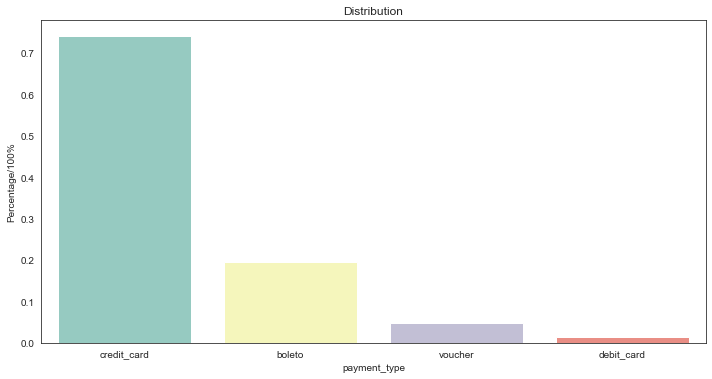

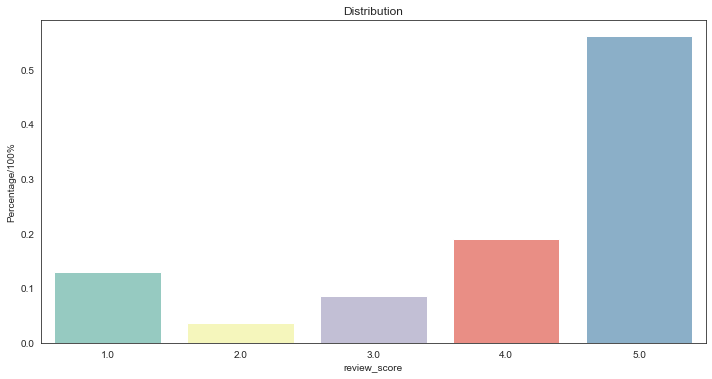

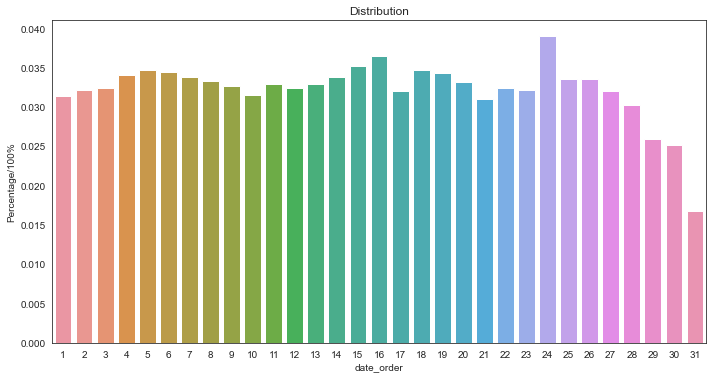

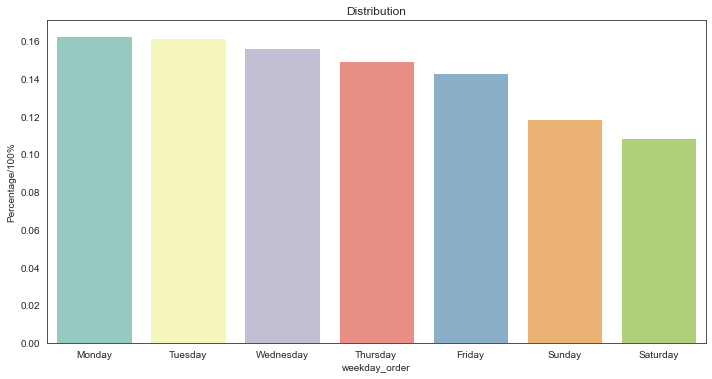

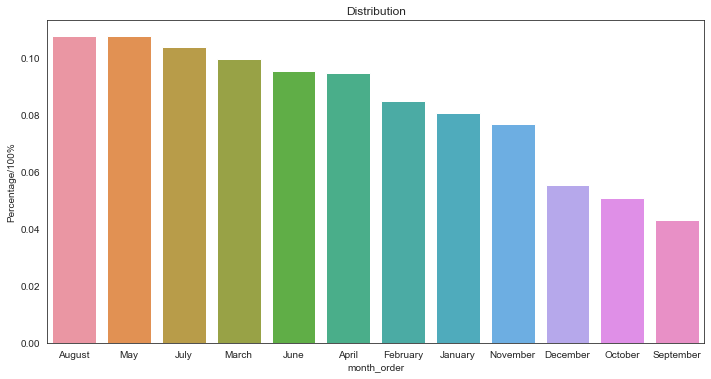

In [22]:
for col in df[['payment_type', 'review_score', 'date_order', 'weekday_order', 'month_order']]:
    value_counts = df[col].value_counts(normalize=True)
    fig, axes = plt.subplots(figsize=(10,5))
    plot = sns.barplot(x = value_counts.index, y = value_counts)
    plt.tight_layout()
    axes.set_title('Distribution')
    axes.set_ylabel('Percentage/100%')
    axes.set_xlabel(col)
    plt.show()

Observations :

- Payment Type: ~74% transactions using credit card, ~20% transactions using boleto, ~9% transactions using vouchers, and ~1& transactions using a debit card.
- Review Score: ~55% of transactions are given a review score of 5, ~19% of transactions are given a review score of 4, and ~11% of transactions are given a review score of 1. The lowest review score is 2 and 3, with below 10% transactions.
- Date Order: Most transactions occur on the 24th, with almost ~4% of transactions 
- Weekday Order:  Most transactions occur on Monday, with almost ~16% of transactions. As the weekend approaches, the number of orders decreases.
- Month Order: Most transactions occur in August and May, with almost ~12% transactions. The fewest transactions occurred in October and September, with only ~5% transactions.

## For Continuous Varibles

price


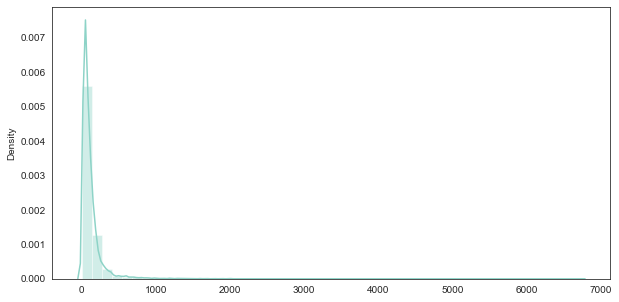

payment_value


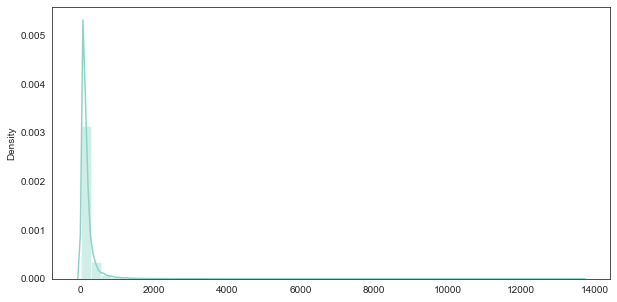

In [23]:
for col in df[['price', 'payment_value']]:
    print(col)
    plt.figure(figsize=(10, 5))   
    sns.distplot(df[[col]])
    plt.show()

Observations:
- Payment Value: The distribution is in the range of R\$1 - R\$14,000. The highest number of transactions is in the range of R\$1 - R\$200. This can happen because customers tend to buy goods at affordable prices.

## Top Products 

In [24]:
top_products = df.groupby("product_category_name_english").agg({"order_id": "count"}).sort_values("order_id", ascending=False).head(10)
top_products

,order_id
product_category_name_english,
bed_bath_table,11803
health_beauty,9933
sports_leisure,8904
furniture_decor,8753
computers_accessories,8104
housewares,7314
watches_gifts,6182
telephony,4692
garden_tools,4552


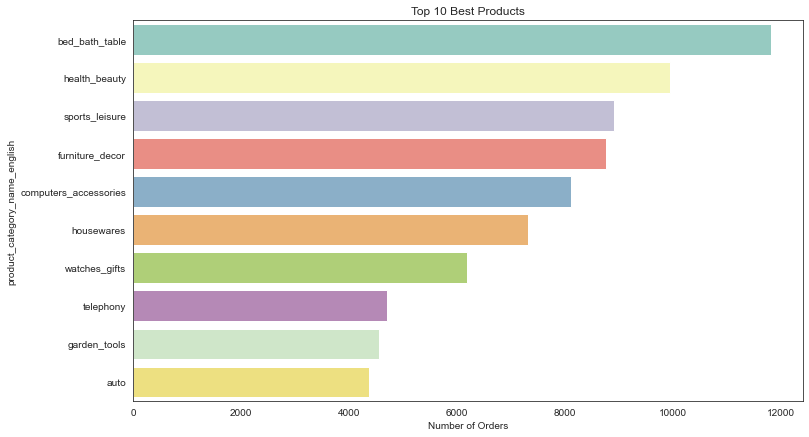

In [25]:
plt.subplots(figsize=(12,7))
sns.barplot(x=top_products['order_id'], y=top_products.index)
plt.title('Top 10 Best Products')
plt.xlabel('Number of Orders')
plt.show()

Observations :
- The most purchased products category is 'Bed Bath Table' with total purchases 11,900 times.
- Those 10 products category can be the attention of marketing team to increase sales.

## Order, Customer, and Total Payment by Month

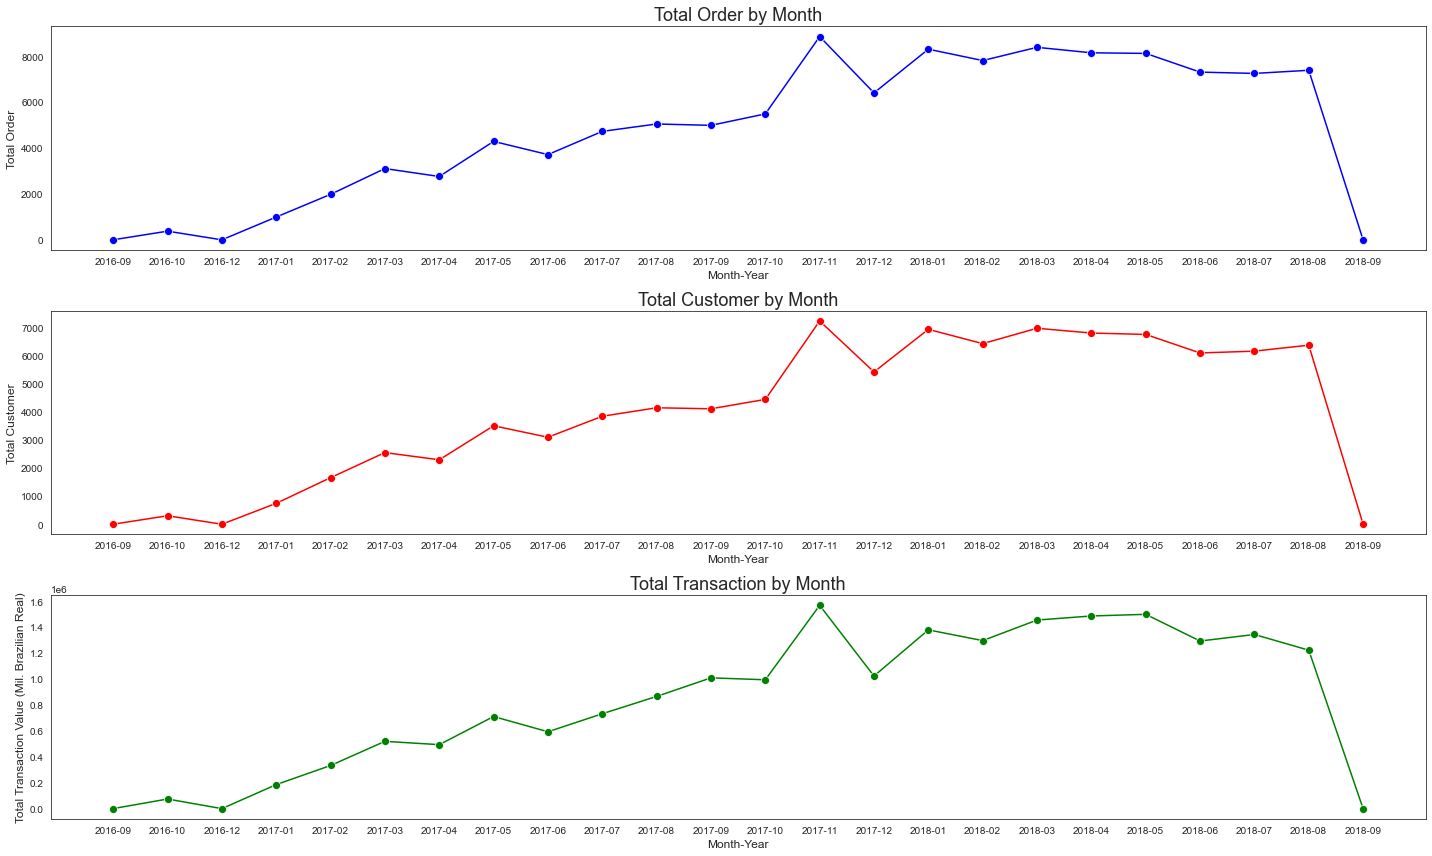

In [26]:
# Group by order, customer, and transaction
order_per_month = df['order_id'].groupby(df['month_year_order']).count()
customer_per_month = df['customer_unique_id'].groupby(df['month_year_order']).nunique()
transaction_per_month = df['payment_value'].groupby(df['month_year_order']).sum()

# Visualization
plt.figure(figsize=(20, 12))

plt.subplot(311)
sns.lineplot(x=order_per_month.index, y=order_per_month.values, marker='o', markersize=8, color='blue')
plt.title('Total Order by Month', fontsize=18)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Total Order', fontsize=12)

plt.subplot(312)
sns.lineplot(x=customer_per_month.index, y=customer_per_month.values, marker='o', markersize=8, color='red')
plt.title('Total Customer by Month', fontsize=18)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Total Customer', fontsize=12)

plt.subplot(313)
sns.lineplot(x=transaction_per_month.index, y=transaction_per_month.values, marker='o', markersize=8, color='green')
plt.title('Total Transaction by Month', fontsize=18)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Total Transaction Value (Mil. Brazilian Real)', fontsize=12)

plt.tight_layout()
plt.show()

Observations :
- The number of orders, total transactions, and the highest number of customers were in November 2017. That can happen because there is a Black Friday that offers promos in November so that customers shop for Christmas gifts.
- The graph tends to increase from 2016 to 2017. However, it has stagnated as it enters 2018.
- There is an anomaly/noise in the data in September 2018, which shows a sudden decline. That might happen because the data collection ended that month, so the data taken was not complete.

# Exploratorty Data Analysis (EDA) Part 2 - RFM
RFM is a technique that can be used to perform Customer Segmentation to determine customers' buying behaviour. The meaning of RFM itself is:

- Recency: The last time the customer made a purchase
- Frequency: Number of transactions
- Monetary: The spending power of a customer

By using RFM, companies can reactivate customers who rarely transact, make customers more loyal, improve marketing strategies to increase revenue from a company.

In [120]:
#Max time
max_time = df['order_purchase_timestamp'].max() + dt.timedelta(1)

#Groupby customer_unique_id
customer = df.groupby('customer_unique_id', as_index=False).agg(
    recency =  ('order_purchase_timestamp', lambda x: (max_time-x.max()).days),
    frequency = ('order_id', 'count'),
    monetary =  ('payment_value', 'sum'),
    most_payment_type = ('payment_type', lambda x: x.value_counts().index[0]),
    avg_review_score = ('review_score', 'mean'),
    most_product_buy = ('product_category_name_english', lambda x: x.value_counts().index[0]),
)

In [121]:
customer.shape

(94087, 7)

In [122]:
customer.head()

,customer_unique_id,recency,frequency,monetary,most_payment_type,avg_review_score,most_product_buy
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90,credit_card,5.0,bed_bath_table
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19,credit_card,4.0,health_beauty
2,0000f46a3911fa3c0805444483337064,542,1,86.22,credit_card,3.0,stationery
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62,credit_card,4.0,telephony
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89,credit_card,5.0,telephony


## Recency

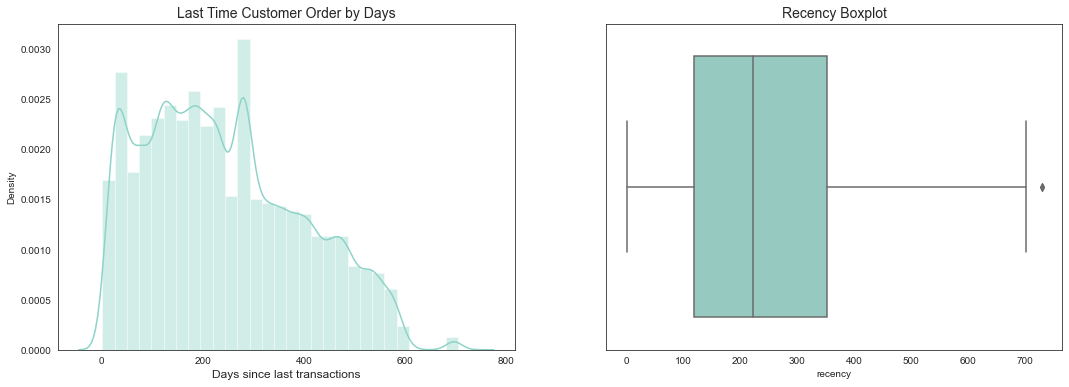

In [68]:
plt.figure(figsize=(18, 6))
plt.subplot(121)
sns.distplot(customer['recency'], bins=30)
plt.title('Last Time Customer Order by Days', fontsize=14)
plt.xlabel('Days since last transactions', fontsize=12)

plt.subplot(122)
sns.boxplot(customer['recency'])
plt.title('Recency Boxplot', fontsize=14)
plt.show()

plt.show()

In [69]:
customer['recency'].describe()

count    94087.000000
mean       242.902558
std        153.156396
min          1.000000
25%        119.000000
50%        223.000000
75%        352.000000
max        729.000000
Name: recency, dtype: float64

Based on the distribution and descriptive statistics of recency:

- The last time the customer made a transaction ranged from 1 day to 729 days (from the last date on the data)
- On average, customers make the last transaction on 243 days or every 8 months (after the last order date)

## Frequency

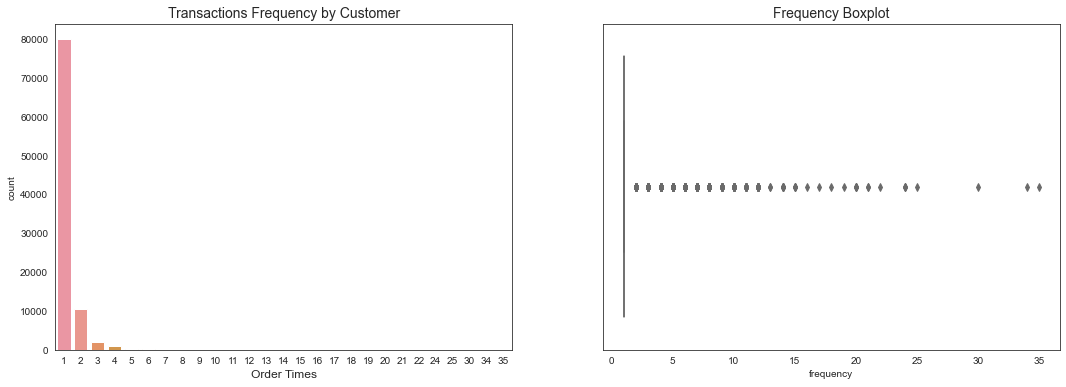

In [70]:
plt.figure(figsize=(18, 6))
plt.subplot(121)
sns.countplot(customer['frequency'])
plt.title('Transactions Frequency by Customer', fontsize=14)
plt.xlabel('Order Times', fontsize=12)

plt.subplot(122)
sns.boxplot(customer['frequency'])
plt.title('Frequency Boxplot', fontsize=14)
plt.show()

plt.show()

In [71]:
customer['frequency'].describe()

count    94087.000000
mean         1.227683
std          0.763923
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         35.000000
Name: frequency, dtype: float64

Based on the distribution and descriptive statistics of frequency:
- Each customer most often orders only 1 time when using this e-commerce. Therefore, it is necessary to increase the number of transactions made by customers by conducting targeted marketing according to their segmentation.
- The maximum number of transactions made by a customer is 15 transactions.
- The number of transactions made by each customer is in the range of 1 to 15 transactions.

## Monetary

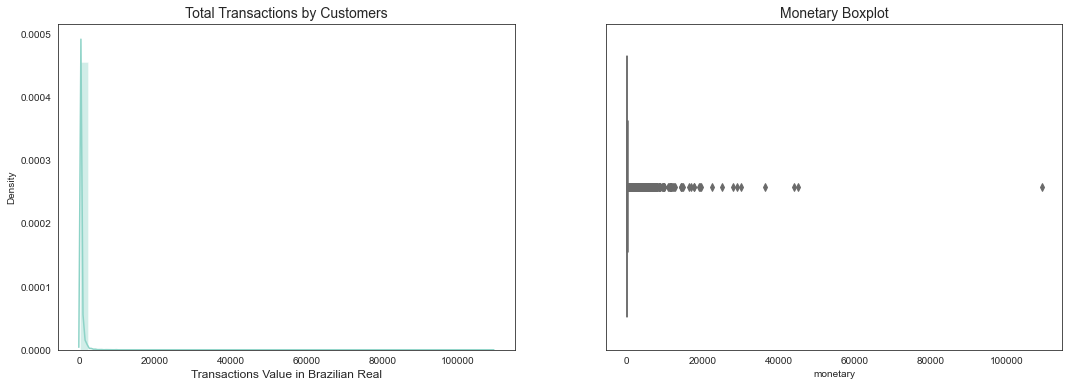

In [72]:
plt.figure(figsize=(18, 6))
plt.subplot(121)
sns.distplot(customer['monetary'])
plt.title('Total Transactions by Customers', fontsize=14)
plt.xlabel('Transactions Value in Brazilian Real', fontsize=12)

plt.subplot(122)
sns.boxplot(customer['monetary'])
plt.title('Monetary Boxplot', fontsize=14)
plt.show()

plt.show()

In [134]:
customer['monetary'].describe()

count     94087.000000
mean        213.365618
std         644.518901
min           8.860000
25%          63.815000
50%         112.940000
75%         203.080000
max      109312.640000
Name: monetary, dtype: float64

Based on the distribution and descriptive statistics of monetary:

- Total purchases from each customer are in the range of R\$ 9 - R\$ 1493 and have an average of R\$ 174
- This shows that the majority of customers have relatively low purchasing power.

# K-Means Clustering
K-Means is an algorithm that can be used for clustering. The K-Means algorithm uses the same distance concept as the KNN algorithm. One of the distance concepts used is Euclidean. Because the K-Means algorithm uses the concept of distance, we have to scale the features we have because the scaling is not the same. The feature that we have shows that there are outliers, and we don't want the outlier data to have an effect so that the scaling that can be used is the Standard Scaler.

In [126]:
# Data
x = customer[['recency', 'frequency', 'monetary']]

# Scaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [135]:
# Calculate Within Cluster Sum Squares (WCSS)
WCSS = []

for i in range(2,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=11)
    kmeans.fit(x_scaled)
    WCSS.append(kmeans.inertia_)

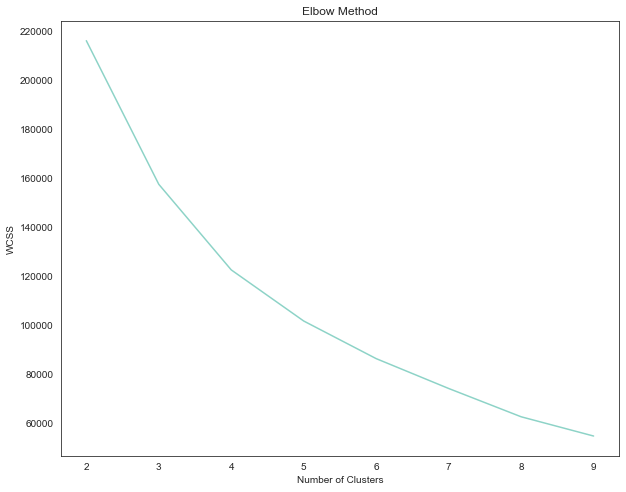

In [140]:
# Elbow Method
plt.figure(figsize=(10,8))
plt.plot(range(2,10), WCSS)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [137]:
# Silhoutte Score
score = []

for i in range(2,9):
  kmeans = KMeans(i)
  kmeans.fit(x_scaled)
  label = kmeans.labels_
  score.append(silhouette_score(x_scaled, label, metric = 'euclidean'))

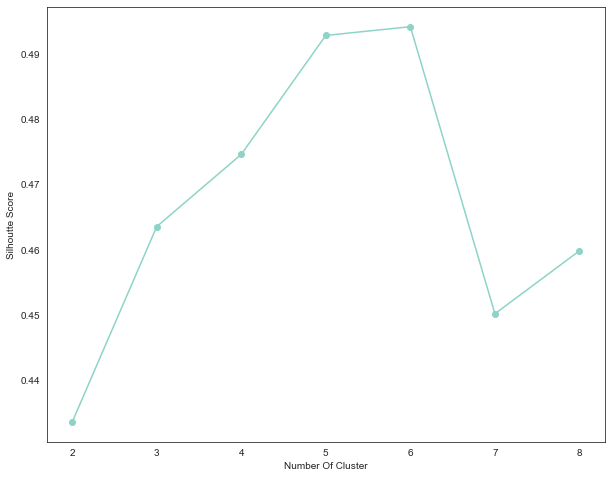

In [139]:
plt.figure(figsize = (10, 8))
plt.plot(range(2,9), score, marker='o')
plt.xlabel("Number Of Cluster")
plt.ylabel('Silhoutte Score')
plt.show()

Based on the Elbow Method and Silhoutte Score: We choose 4 clusters.

In [141]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=11)
kmeans.fit(x_scaled)

customer['label_kmeans'] = kmeans.labels_

# K-Means Clustering Result

In [142]:
segment_analysis = customer.groupby(['label_kmeans'])[['recency', 'frequency', 'monetary']].mean()
segment_analysis

,recency,frequency,monetary
label_kmeans,,,
0,392.978179,1.119665,170.488908
1,236.808683,3.971989,1141.964465
2,132.469855,1.115336,170.771422
3,207.850000,11.400000,27733.938000


- 0: Customers who have not made a transaction for a long time, only made 1 transaction, and lowest total transaction. We can call it **Lost Customers**
- 1: Customers who recently made a transaction, more than 1 transaction, and the total transaction is high. We can call it **Loyal Customers**
- 2: Customers who recently made a transaction, only make 1 transaction, and the total transaction is low. We can call it **New Customers**
- 3: Customers who recently made a transaction, more than 1 transaction, and highest total transaction. We can call it **Best Customers**

In [143]:
segment_analysis.rename({
    0:'Lost Customers',
    1:'Loyal Customers',
    2:'New Customers',
    3:'Best Customers'
})

,recency,frequency,monetary
label_kmeans,,,
Lost Customers,392.978179,1.119665,170.488908
Loyal Customers,236.808683,3.971989,1141.964465
New Customers,132.469855,1.115336,170.771422
Best Customers,207.850000,11.400000,27733.938000


In [146]:
# Labeling
customer['labels'] = customer['label_kmeans'].map({
    0:'Lost Customers',
    1:'Loyal Customers',
    2:'New Customers',
    3:'Best Customers'
})

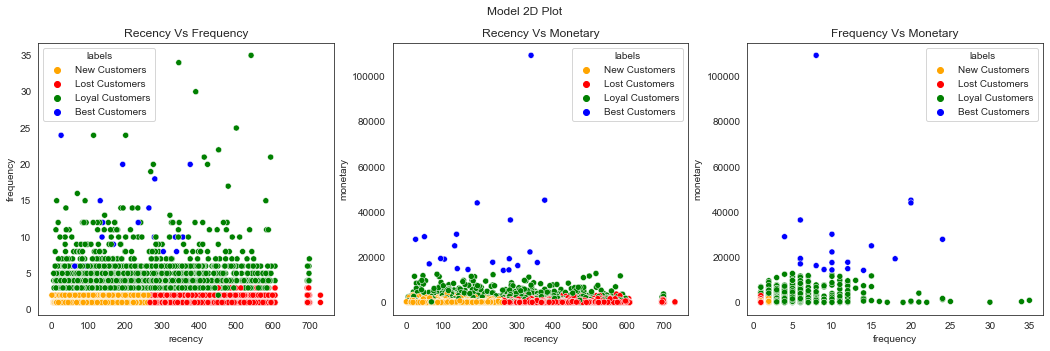

In [152]:
# 2D Scatter Plot
plt.figure(figsize =(18,5))

# Recency vs Frequency
plt.subplot(131)
sns.scatterplot(x = 'recency', y = 'frequency', hue = 'labels', data = customer, palette=['orange', 'red', 'green', 'blue'])
plt.title('Recency Vs Frequency')

# Recency Vs Monetary
plt.subplot(132)
sns.scatterplot(x = 'recency', y = 'monetary', hue = 'labels', data = customer, palette=['orange', 'red', 'green', 'blue'])
plt.title('Recency Vs Monetary')

# Frequency Vs Monetary
plt.subplot(133)
sns.scatterplot(x = 'frequency', y = 'monetary', hue = 'labels', data = customer, palette=['orange', 'red', 'green', 'blue'])
plt.title('Frequency Vs Monetary')

plt.suptitle('Model 2D Plot')
plt.show()

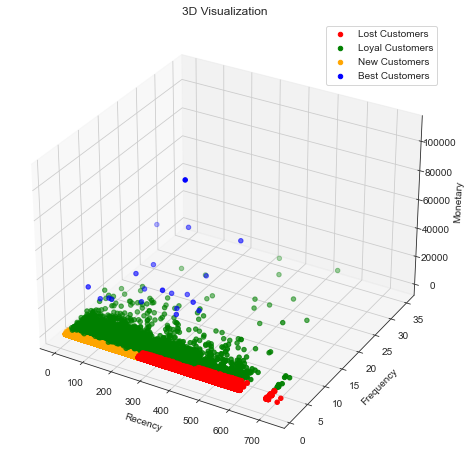

In [154]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(customer['recency'][customer.label_kmeans == 0], 
           customer['frequency'][customer.label_kmeans == 0],
           customer['monetary'][customer.label_kmeans == 0],
           c='red', label='Lost Customers')
ax.scatter3D(customer['recency'][customer.label_kmeans == 1], 
           customer['frequency'][customer.label_kmeans == 1],
           customer['monetary'][customer.label_kmeans == 1],
           c='green', label='Loyal Customers')
ax.scatter3D(customer['recency'][customer.label_kmeans == 2], 
           customer['frequency'][customer.label_kmeans == 2],
           customer['monetary'][customer.label_kmeans == 2],
           c='orange', label='New Customers')
ax.scatter3D(customer['recency'][customer.label_kmeans == 3], 
           customer['frequency'][customer.label_kmeans == 3],
           customer['monetary'][customer.label_kmeans == 3],
           c='blue', label='Best Customers')

plt.title('3D Visualization')
plt.xlabel('Recency')
plt.ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.legend()

plt.show()

In [149]:
customer['labels'].value_counts()

New Customers      52048
Lost Customers     38449
Loyal Customers     3570
Best Customers        20
Name: labels, dtype: int64

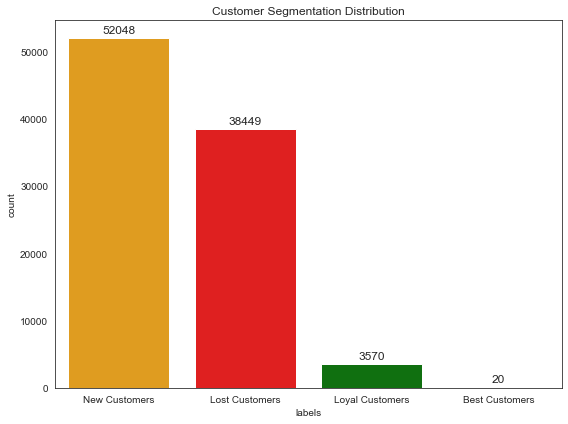

In [155]:
## Distribution
plt.figure(figsize = (8,6))
plots = sns.countplot(x='labels', data = customer, palette=['orange', 'red', 'green', 'blue'])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x()+ bar.get_width()/2,
                    bar.get_height()), ha='center', va='center',
                   size=12,xytext=(0,8),
                   textcoords='offset points')
plt.title('Customer Segmentation Distribution')
plt.tight_layout()
plt.show()

# Cluster Analysis

In [157]:
# RFM Segmentation Group by for analysis
rfm_segment = customer.groupby(['labels', 'label_kmeans']).agg(
    n_customer = ('customer_unique_id', 'count'),
    mean_recency =  ('recency', 'mean'),
    min_recency = ('recency', 'min'),
    max_rencency = ('recency', 'max'),
    mean_freq = ('frequency', 'mean'),
    min_freq = ('frequency', 'min'),
    max_freq = ('frequency', 'max'),
    mean_monetary =  ('monetary', 'mean'),
    min_monetary = ('monetary', 'min'),
    max_monetary = ('monetary', 'max'), 
    most_payment_type = ('most_payment_type', lambda x: x.value_counts().index[0]),
    most_product_buy = ('most_product_buy', lambda x: x.value_counts().index[0]),
).sort_values(by='n_customer')

rfm_segment

,,n_customer,mean_recency,min_recency,max_rencency,mean_freq,min_freq,max_freq,mean_monetary,min_monetary,max_monetary,most_payment_type,most_product_buy
labels,label_kmeans,,,,,,,,,,,,
Best Customers,3,20,207.850000,26,376,11.400000,4,24,27733.938000,14196.28,109312.64,credit_card,computers_accessories
Loyal Customers,1,3570,236.808683,6,699,3.971989,1,35,1141.964465,12.29,12834.50,credit_card,furniture_decor
Lost Customers,0,38449,392.978179,263,729,1.119665,1,3,170.488908,8.86,4016.91,credit_card,bed_bath_table
New Customers,2,52048,132.469855,1,262,1.115336,1,2,170.771422,9.59,4163.51,credit_card,health_beauty


Conclusion:
1. **Best Customers**:
- This segment consists of 20 customers
- Customers can be said as **Best Customers** when made transactions recently, made more than 1 transaction, and had the highest total transactions.
- In this segment, the average total transaction per customer is around R\$ 27,733, with an average transaction frequency of 11 times and an average last purchase time of around 207 days/7 months.
- Most customers buy the computers accesories category with credit card payment method.
- Treatments for this segments are loyalty program/reward points, new product recommendations, and exclusive product offers. (Cross / Up-Selling Strategy)

2. **Loyal Customers**:
- This segment consists of 3,570 customers
- Customers can be said as **Loyal Customers** when made transactions recently, made more than 1 transaction, and had the high total transactions.
- In this segment, the average total transaction per customer is around R\$ 1,141, with an average transaction frequency of 4 times and an average last purchase time of around 236 days/8 months.
- Most customers buy the furniture decoration category with credit card payment method.
- Treatments for this segments are loyalty program/reward points and new product recommendations(Cross / Up-Selling Strategy)

3. **New Customers**:
- This segment consists of 52,048 customers. The highest segment number.
- Customers can be said as **New Customers** when made transactions recently, made only 1 transaction, and had the low total transactions.
- In this segment, the average total transaction per customer is around R\$170 with an average transaction frequency of 1 time and an average last purchase time of around 132 days/4 months.
- Most customers buy the health beauty category with the credit card payment method.
- Treatments for this segments are welcome e-mail to build the relationship, offer loyalty program/reward points, and discount vouchers (Cross/Up-Selling Strategy)

4. **Lost Customers**:
- This segment consists of 38,449 customers. The highest segment number.
- Customers can be said as **New Customers** when not made a transaction for a long time, made only 1 transaction, and had the lowest total transactions.
- In this segment, the average total transaction per customer is around R\$170 with an average transaction frequency of 1 time and an average last purchase time of around 132 days/4 months.
- Most customers buy the bed bath table category with the credit card payment method.
- Treatments for this segments are regular limited offers, discount vouchers, campaign via e-mail and asking for feedback. (Retention & Reactivate Strategies)

# Business Recommendation

| RFM Segment             | Description                                                                                                                       | Strategy                                                             |
|-----------------------------|----------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------|
| Best Customers          | Made transactions recently, made more than 1 transaction, and had the highest total transactions. |  Loyalty program/reward points, new product recommendations, and exclusive product offers. (Cross / Up-Selling Strategy)|
| Loyal Customers         | made transactions recently, made more than 1 transaction, and had the high total transactions.                                                                              |  loyalty program/reward points and new product recommendations(Cross / Up-Selling Strategy)    |    
| New Customers           | Made transactions recently, made only 1 transaction, and had the low total transactions.                             | Welcome e-mail to build the relationship, offer loyalty program/reward points, and discount vouchers (Cross/Up-Selling Strategy) |
| Lost Customers           | Not made a transaction for a long time, made only 1 transaction, and had the lowest total transactions.      |  Regular limited offers, discount vouchers, campaign via e-mail and asking for feedback. (Retention & Reactivate Strategies)